<a href="https://colab.research.google.com/github/vimesh630/ML_CW/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and Google Drive Mounting

In [11]:
# Importing required libraries
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Preprocessed Data

In [12]:
# Load preprocessed data
train_data_path = '/content/drive/My Drive/ML Coursework/Preprocessed Dataset/train_data.csv'
test_data_path = '/content/drive/My Drive/ML Coursework/Preprocessed Dataset/test_data.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Split features (X) and target (y)
X_train = train_data.drop('y', axis=1).values
y_train = train_data['y'].values
X_test = test_data.drop('y', axis=1).values
y_test = test_data['y'].values

Define the Neural Network Model

In [13]:
# Define the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Input layer + First hidden layer
    Dropout(0.3),                                              # Dropout for regularization
    Dense(64, activation='relu'),                              # Second hidden layer
    Dropout(0.2),                                              # Dropout for regularization
    Dense(1, activation='sigmoid')                             # Output layer (binary classification)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])

Train the Model

In [15]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,                 # Number of epochs
                    batch_size=32,             # Batch size
                    validation_split=0.2,      # Use 20% of training data for validation
                    verbose=1)                 # Display training progress

Epoch 1/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8419 - loss: 0.3659 - val_accuracy: 0.8813 - val_loss: 0.2853
Epoch 2/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8823 - loss: 0.2895 - val_accuracy: 0.8885 - val_loss: 0.2687
Epoch 3/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8914 - loss: 0.2707 - val_accuracy: 0.8959 - val_loss: 0.2571
Epoch 4/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8960 - loss: 0.2623 - val_accuracy: 0.8957 - val_loss: 0.2557
Epoch 5/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8965 - loss: 0.2596 - val_accuracy: 0.8997 - val_loss: 0.2485
Epoch 6/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8999 - loss: 0.2503 - val_accuracy: 0.8984 - val_loss: 0.2471
Epoch 7/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9010 - loss: 0.2504 - val_accuracy: 0.9030 - val_loss: 0.2421
Epoch 8/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9034 - loss: 0.2435 -

Evaluate the Model

In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.2117
Test Accuracy: 0.9212


Predict and Analyze Results

In [17]:
# Predict and evaluate performance
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      8015
           1       0.89      0.97      0.92      8072

    accuracy                           0.92     16087
   macro avg       0.92      0.92      0.92     16087
weighted avg       0.92      0.92      0.92     16087


Confusion Matrix:
[[7027  988]
 [ 279 7793]]


Plot Training and Validation Accuracy/Loss

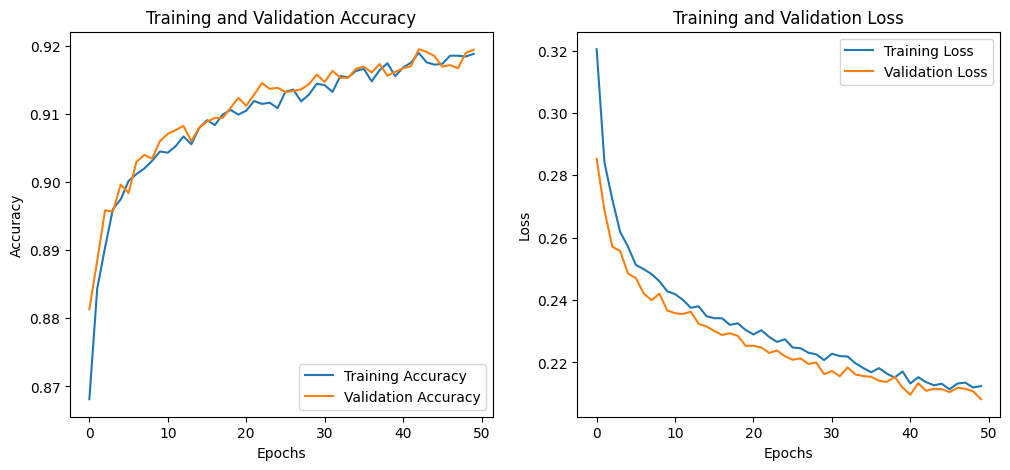

In [18]:
# Visualization: Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Visualize Confusion Matrix

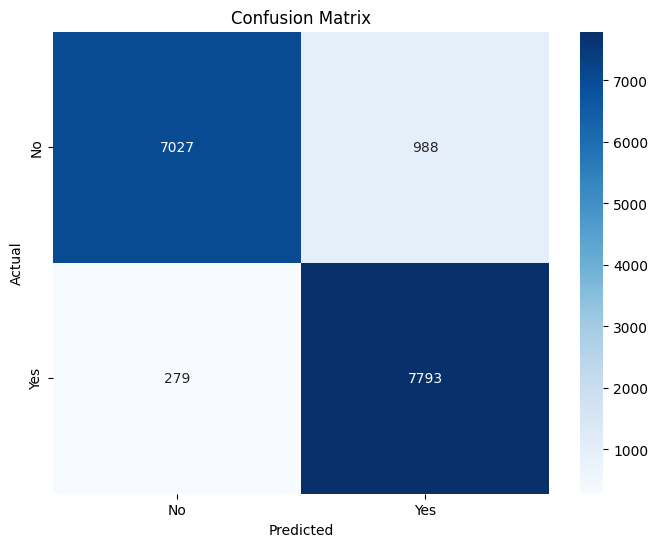

In [19]:
# Visualization: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Plot ROC Curve

503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


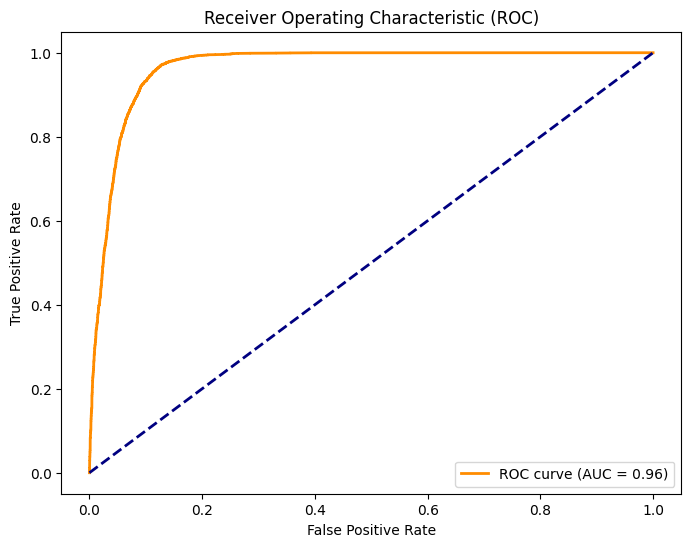

In [20]:
# Visualization: ROC Curve
y_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Plot Precision-Recall Curve

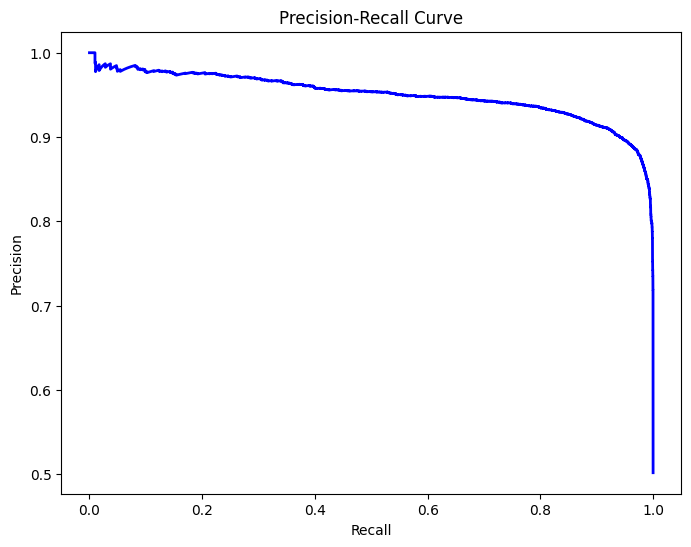

In [21]:
# Visualization: Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Example: Predict for the first 10 clients in the test set

In [22]:
sample_clients = X_test[:10]
predicted_probabilities = model.predict(sample_clients)
predicted_classes = (predicted_probabilities > 0.5).astype("int32")

print("Predicted Probabilities:\n", predicted_probabilities)
print("Predicted Classes (0 = No, 1 = Yes):\n", predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Probabilities:
 [[1.5052994e-04]
 [3.1133339e-01]
 [9.6223718e-01]
 [8.8241827e-01]
 [1.4586184e-10]
 [9.6223736e-01]
 [9.6544129e-01]
 [9.6251380e-01]
 [3.3933608e-04]
 [5.0175297e-01]]
Predicted Classes (0 = No, 1 = Yes):
 [[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]
